In [24]:
import pandas as pd
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

In [28]:
df_analise_harmonia = pd.read_pickle('df_analise_harmonia.pkl')
df_vagalume_discografia = pd.read_pickle('df_vagalume_discografia_.pkl')
df_analise_harmonia = df_analise_harmonia[(df_analise_harmonia['tonalidade']!='sem_info')&
                                          (df_analise_harmonia['perc_acordes_fora_campo_decil']!='sem_info')&
                                          (df_analise_harmonia['tamanho_medio_progressao_decil']!='sem_info')]

In [29]:
df_analise_harmonia.head(3)

,artista,musica,tonalidade,cifra,letra,cifra_limpa,letra_limpa,cifra_limpa_reduzida,lista_teste_grau_1,lista_teste_pertence_campo,...,num_acordes_fora_campo,perc_acordes_fora_campo,tamanho_medio_progressao,media_complexidade,media_raridade,num_acordes_distintos_decil,perc_acordes_fora_campo_decil,tamanho_medio_progressao_decil,media_raridade_decil,media_complexidade_decil
1137,3-palavrinhas,a-deus-dai-louvor,D,"[<b>E</b>, <b>F#</b>, <b>G</b>, <b>A7</b>, <b>...",[<p>A Deus dai louvor com todo ser<br/>Com tod...,"[E, F#, G, A7, A, G, F#, E, D, D, A7, A, G, F#...",a deus dai louvor com todo ser quebralinha co...,"[E, F#, G, A, A, G, F#, E, D, D, A, A, G, F#, ...","[False, False, False, False, False, False, Fal...","[False, False, True, True, True, True, False, ...",...,10,0.192308,2.26087,3.25,0.000018,7,6,1,3,6
1138,3-palavrinhas,pare,A,"[<b>A</b>, <b>D</b>, <b>A</b>, <b>D</b>, <b>E<...",[<p>Pare! Eu vou contar-lhe o que Cristo fez p...,"[A, D, A, D, E, A, D, E, A, D, E, A, D, E, A, ...",pare eu vou contarlhe o que cristo fez por mi...,"[A, D, A, D, E, A, D, E, A, D, E, A, D, E, A, ...","[True, False, True, False, False, True, False,...","[True, True, True, True, True, True, True, Tru...",...,0,0.0,2.375,3.00,0.000009,1,1,2,1,1
1139,3-palavrinhas,a-formiga,G,"[<b>G</b>, <b>D</b>, <b>G</b>, <b>D</b>, <b>G<...",[<p>A formiguinha corta folha e carrega<br/>Qu...,"[G, D, G, D, G, C, G, D, G, C, G, D, G, G, D, ...",a formiguinha corta folha e carrega quebralin...,"[G, D, G, D, G, C, G, D, G, C, G, D, G, G, D, ...","[True, False, True, False, True, False, True, ...","[True, True, True, True, True, True, True, Tru...",...,0,0.0,1.8,3.00,0.000007,1,1,1,1,1


In [30]:
df_vagalume_discografia.head(3)

,artista,album,musica,ano
0,14-bis,novo-millennium-14-bis,linda-juventude,2005
1,14-bis,novo-millennium-14-bis,linda-juventude,2005
2,14-bis,novo-millennium-14-bis,planeta-sonho,2005


In [31]:
df_vagalume_discografia = df_vagalume_discografia[(df_vagalume_discografia['musica']!='')&(df_vagalume_discografia['ano']!='0000')]
df_vagalume_discografia_min_ano = df_vagalume_discografia[['artista', 'musica', 'ano']].groupby(['artista', 'musica']).min().reset_index()


In [33]:
df_analise_harmonia_tempo = df_analise_harmonia[['artista', 'musica', 'num_acordes_distintos', 'num_acordes_distintos_decil','perc_acordes_fora_campo_decil','tamanho_medio_progressao_decil','media_raridade_decil','media_complexidade_decil']].merge(df_vagalume_discografia_min_ano, how = 'inner', on = ['artista', 'musica'])
df_analise_harmonia_tempo['media_nota_harmonia'] = (df_analise_harmonia_tempo['num_acordes_distintos_decil'] +
                                                    df_analise_harmonia_tempo['perc_acordes_fora_campo_decil'] +
                                                    df_analise_harmonia_tempo['tamanho_medio_progressao_decil'] +
                                                    df_analise_harmonia_tempo['media_raridade_decil'] +
                                                    df_analise_harmonia_tempo['media_complexidade_decil'])/5
df_analise_harmonia_tempo.head()


,artista,musica,num_acordes_distintos,num_acordes_distintos_decil,perc_acordes_fora_campo_decil,tamanho_medio_progressao_decil,media_raridade_decil,media_complexidade_decil,ano,media_nota_harmonia
0,galinha-pintadinha,a-barata,3,1,1,1,1,1,2010,1.0
1,galinha-pintadinha,ciranda-cirandinha,5,3,4,3,2,6,2012,3.6
2,galinha-pintadinha,marcha-soldado,5,3,7,4,1,1,2010,3.2
3,galinha-pintadinha,alecrim-dourado,8,6,7,5,4,1,2010,4.6
4,galinha-pintadinha,fui-morar-numa-casinha,3,1,1,1,1,1,2012,1.0


In [34]:
df_analise_harmonia_tempo_agrupado = df_analise_harmonia_tempo[['ano', 'media_nota_harmonia']].groupby(['ano']).mean().reset_index().sort_values('ano')
df_analise_harmonia_tempo_agrupado


,ano,media_nota_harmonia
0,1952,6.000000
1,1953,8.600000
2,1956,4.720000
3,1958,5.133333
4,1959,7.153846
...,...,...
63,2019,5.041081
64,2020,4.997183
65,2021,4.877551
66,2022,5.143243


<Axes: >

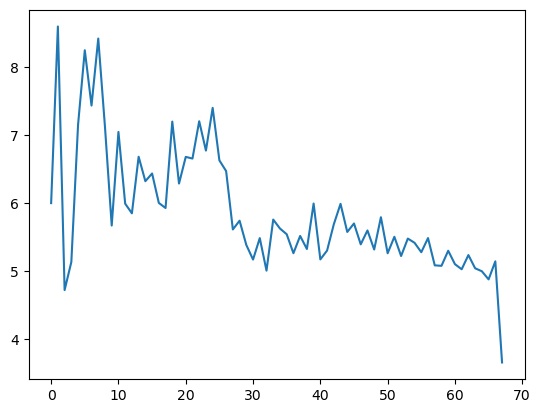

In [35]:
df_analise_harmonia_tempo_agrupado['media_nota_harmonia'].plot.line()

In [36]:
df_analise_harmonia_tempo_agrupado.to_pickle('df_analise_harmonia_tempo_agrupado.pkl')

In [42]:
df_analise_harmonia_tempo[df_analise_harmonia_tempo['ano']=='2023']['num_acordes_distintos'].mean()

5.696969696969697

In [43]:
df_analise_harmonia_tempo[df_analise_harmonia_tempo['num_acordes_distintos']==5]

,artista,musica,num_acordes_distintos,num_acordes_distintos_decil,perc_acordes_fora_campo_decil,tamanho_medio_progressao_decil,media_raridade_decil,media_complexidade_decil,ano,media_nota_harmonia
1,galinha-pintadinha,ciranda-cirandinha,5,3,4,3,2,6,2012,3.6
2,galinha-pintadinha,marcha-soldado,5,3,7,4,1,1,2010,3.2
7,galinha-pintadinha,a-canoa-virou,5,3,5,1,5,8,2010,4.4
10,galinha-pintadinha,quem-esta-feliz,5,3,7,2,1,1,2010,2.8
13,galinha-pintadinha,cao-amigo,5,3,1,4,3,1,2010,2.4
...,...,...,...,...,...,...,...,...,...,...
10195,tomate,anjo-bom,5,3,1,4,1,4,2009,2.6
10218,parangole,tchubirabiron,5,3,1,5,3,4,2011,3.2
10220,parangole,a-santa,5,3,5,7,2,1,2011,3.6
10224,parangole,negro-lindo,5,3,1,8,3,5,2011,4.0
